In [1]:
# asumption: I'll get just the etiquette photo, already preprocessed - i'll just get info from said etiquette

# standard imports
import numpy as np
import cv2
import pandas as pd
import pickle as pkl

# task specific


# for visualisation --> just for development
import matplotlib.pyplot as plt

In [2]:
!python --version

Python 3.8.8


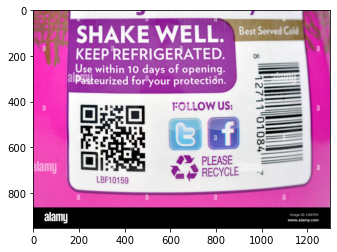

In [3]:
# lets see the photo first - here an example jpeg

img_qr = cv2.imread("test_qr_code.jpeg")
img_qr = cv2.cvtColor(img_qr, cv2.COLOR_BGR2RGB)
plt.imshow(img_qr, cmap='gray')
plt.show()

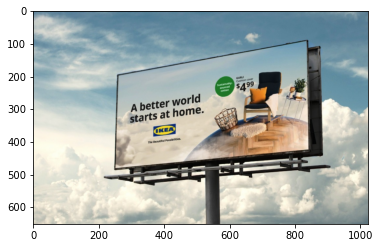

In [4]:
# now a photo with no qr code

img_no_qr = cv2.imread("test_bilboard.jpeg")
img_no_qr = cv2.cvtColor(img_no_qr, cv2.COLOR_BGR2RGB)
plt.imshow(img_no_qr, cmap='gray')
plt.show()

In [5]:
# first of all lets find that QR code

qrCodeDetector = cv2.QRCodeDetector()

points = qrCodeDetector.detect(img_qr)
# if points[0] is False, there is no qr code in the picture

value, points, qr_code = qrCodeDetector.detectAndDecode(img_no_qr)
# if no qr on picture, empty string as value and others none

In [6]:
value

''

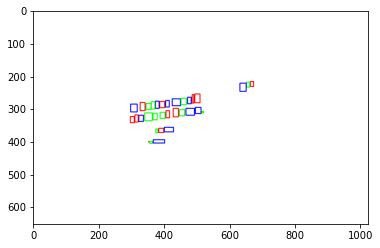

In [20]:
# experiments to show how does cv2.text.detectTextSWT works

result, draw, chainBBs = cv2.text.detectTextSWT(img_no_qr, True)
plt.imshow(draw)
plt.show()

In [23]:
chainBBs


array([[[     353,      393,       49,       11],
        [     632,      215,       42,       30],
        [     375,      355,       54,       17],
        [     387,      276,       16,       52],
        [     374,      275,       11,       22],
        [     327,      279,       37,       56],
        [     298,      284,       20,       24],
        [     297,      304,      120,       37],
        [     345,      253,      165,       48],
        [     361,      263,      122,       36],
        [     311,      294,      202,       45],
        [     467,      297,       54,       21],
        [     405,      255,       86,       38],
        [ 1000000,  1000000, -1000000, -1000000],
        [ 1000000,  1000000, -1000000, -1000000]]], dtype=int32)

In [8]:
from timeit import timeit
import time

def conditional_timeit(condition):
    def decorator(func):
        if not condition:
            # Return the function unchanged, not decorated.
            return func
        return timeit(func)
    return decorator


# class that will take in a photo and give back information on the package
class EtiquetteAnalyser:
    
    def __init__(self, image=None,
                 scientific_mode=False, 
                 return_type="text", 
                 text_detection_method="SWT"):
        
        self.image = image                                 # etiquette picture
        self.scientific_mode = scientific_mode             # if true, will return times of text detection
        self.return_type = return_type                     # either return detected text (for engineering thesis)
                                                           # or return data found by the class
        self.text_detection_method = text_detection_method # to determine what algorithm for text detection to use
      
    
    def load_image(self, image):
        self.image = img
        
    def get_image(self):
        return self.image
    
    def get_etiquette_text(self):
        return self._etiquette_text
    
    def get_package_data(self):
        return self._package_data
    
    def get_qr_code(self):
        if self._qr_code_present:
            return self._qr_code
        else:
            raise ValueError("No qr code detected")
            
    def get_text_analysis_time(self):
        return self._text_detection_time
    
        
    # TODO: 
    def data_extract():
        if self.image is None:
            raise ValueError("No loaded image to analyse.")
        
        database_entry_found = self._qr_analyse()
        
        if not database_entry_found or self.return_type == "text":      # just in case we still want the text 
            
            if self.text_detection_method == "SWT":
                self._text_swt()
                
            elif self.text_detection_method == "MSER":
                self._text_mser()
                
            elif self.text_detection_method == "sliding_window":
                self._text_sliding_window()
        
        # depending on return_type we either continue, or stop here
        if self.return_type == "text":
            return self.get_etiquette_text()
        
        elif self.return_type == "data":
            
            if self._package_data is None:
                self._NLP_that_package()
                
            return self.get_package_data()
            
            
    
        
        
    # will return True if data from QR code is in database, otherwise False
    def _qr_analyse(self):
        qr_detector = cv2.QRCodeDetector()
        points = qr_detector.detect(self.image)
        
        # if no qr code detected, return False
        if not points[0]:
            self._qr_code_present = False
            return False
        else:
            self._qr_code_present = True
            
        value, points, qr_code = qr_detector.detectAndDecode(self.image)
        self._qr_code = qr_code
        
        # TODO: sprawdzenie z bazą danych
        baza_danych = [] # bardzo na chypcika
        
        if value in baza_danych:
            # odczyt danych z bazy danych, zapis w self._package_data
            return True
        else:
            return False
    
    # TODO:
#     @conditional_timeit(self.scientific_mode)
    def _text_swt(self):
        raise NotImplementedError()
    
    # TODO: 
#     @conditional_timeit(self.scientific_mode)
    def _text_mser(self):
        raise NotImplementedError()
    
    # TODO:
#     @conditional_timeit(self.scientific_mode)
    def _text_sliding_window(self):
        raise NotImplementedError()
        
    # for much further development:
    def _NLP_that_package(self):
        print("NLP as masters, nothing here so far")
        pass
    
    _qr_code_present = None
    _qr_code = None
    _package_data = None
    
    _etiquette_text = None
    _text_detection_time = None
    
    

In [9]:
from timeit import timeit

In [10]:
cv2.text.detectTextSWT

<function detectTextSWT>

In [11]:
# !pip install opencv-contrib-python --upgrade

In [12]:
# !pip install opencv-python --upgrade

In [13]:
# !pip install pytesseract --upgrade

In [14]:
# !pip install --upgrade pip